# [AI Innovation Square 릴레이 온라인 특강: 시각] 


## 7. Data Augmentation

- 이미지 데이터를 반전,회전, 색상 변환 등을 통해서 이미지 데이터를 늘리는 기법


> - overfitting 막는 법
    - dropout
    - early stopping
    - **data augmentation**
    - regularizer


1. Augmentor 
    - 외부 라이브러리 이용해서 쉽게 사용하도록 도와줌
    - 확장 어려움
2. 사용자 지정
    1. Preprocessing layer
    2. Lambda layer
    3. tf.image  

참고 : https://www.tensorflow.org/tutorials/images/data_augmentation?hl=ko

In [1]:
import tensorflow as tf

#### TensorFlow Dataset
데이터 세트 다운로드
- TensorFlow Dataset 이용
    - 지도학습용 데이터셋
    - 3-way hold-out: train, test, validation
    - 관련 메타데이터 제공

In [58]:
import tensorflow as tf
import tensorflow_datasets as tfds

(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

함수형 패러다임
- generator, iterator

변환
- numpy -> tf.data.Dataset
    - 변환에는 문제 없음
    - 변환 리소스 문제
- tensorflow_io 직접불러오기 

In [3]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [4]:
tf.data.Dataset.from_generator

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.from_generator>

In [5]:
tf.data.Dataset.from_tensors([1,2,3]) #tf.data.Dataset으로 바꿔줌

<TensorDataset shapes: (3,), types: tf.int32>

In [6]:
tf.data.Dataset.from_tensor_slices #batch 기반으로 나눔

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.from_tensor_slices>

In [7]:
x= tf.constant([1,2,3]) # tf -> np

In [8]:
x.numpy()

array([1, 2, 3], dtype=int32)

In [9]:
train_ds #Prefecth'Dataset'

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [10]:
train_ds.__class__

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [11]:
issubclass(train_ds.__class__, tf.data.Dataset ) #상속받음

True

In [12]:
train_ds.cache() #CacheDataset

<CacheDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [13]:
train_ds.cache().batch(512) #BatchDataset

<BatchDataset shapes: ((None, None, None, 3), (None,)), types: (tf.uint8, tf.int64)>

In [14]:
metadata

tfds.core.DatasetInfo(
    name='tf_flowers',
    version=3.0.1,
    description='A large set of images of flowers',
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    total_num_examples=3670,
    splits={
        'train': 3670,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
    redistribution_info=,
)

In [15]:
dir(metadata)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_builder',
 '_compute_dynamic_properties',
 '_dataset_info_path',
 '_features',
 '_fully_initialized',
 '_info_proto',
 '_license_path',
 '_metadata',
 '_set_splits',
 '_splits',
 'as_json',
 'as_proto',
 'citation',
 'compute_dynamic_properties',
 'data_dir',
 'dataset_size',
 'description',
 'download_size',
 'features',
 'full_name',
 'homepage',
 'initialize_from_bucket',
 'initialized',
 'metadata',
 'name',
 'read_from_directory',
 'redistribution_info',
 'splits',
 'supervised_keys',
 'update_splits_if_different',
 'version',
 'write_to_directory']

In [16]:
metadata.features  #FeaturesDict : Dictionary 상속받음

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
})

In [17]:
metadata.features['label']

ClassLabel(shape=(), dtype=tf.int64, num_classes=5)

In [18]:
metadata.features['image']

Image(shape=(None, None, 3), dtype=tf.uint8)

In [21]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape=(4,))
])

None : 형태가 정해지지 않았다.

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [19]:
metadata.features['label'].int2str(1)  #sklearn 의 inverse_transform 

'daisy'

In [ ]:
int2str 은 LabelEncoder의 inverse_transform 처

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
x=LabelEncoder()
x.fit_transform(['a','b','c'])

array([0, 1, 2])

In [34]:
x.inverse_transform([0])

array(['a'], dtype='<U1')

이미지 데이터 저장 
1. DB
2. file : 클래스별로 디렉토리
3. hdf5
4. DataFrame
5. Numpy,Tensor Pickling

좌우반전
PIL, OpenCV 이용
따로 저장하지 않음

In [28]:
num_classes = metadata.features['label'].num_classes #5개의 클래스
print(num_classes)

5


In [30]:
get_label_name = metadata.features['label'].int2str
get_label_name

<bound method ClassLabel.int2str of ClassLabel(shape=(), dtype=tf.int64, num_classes=5)>

In [ ]:
tf.keras.preprocessing.image  #image, text..
tf.keras.preprocessing.text

In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator

In [ ]:
tf.keras.layers.experimental.preprocessing #이미지,텍스트 전처리 기능 제공

### 1. preprocessing layers
- 모델 내, 밖서 레이어 적용 가능

    - resizing :이미지 크기 맞추기
    - rescaling: 스케일링
      - [0,1] 표준화
    - RandomFlip 랜덤 상하좌우반전
    - RandomRotation 랜덤 회전

In [64]:
from tensorflow.keras import layers

IMG_SIZE = 180

image, label = next(iter(train_ds))
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])


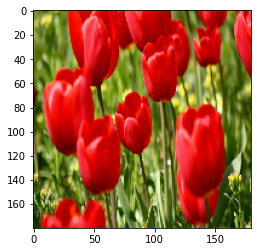

In [65]:
import matplotlib.pyplot as plt
result = resize_and_rescale(image)
_ = plt.imshow(result)

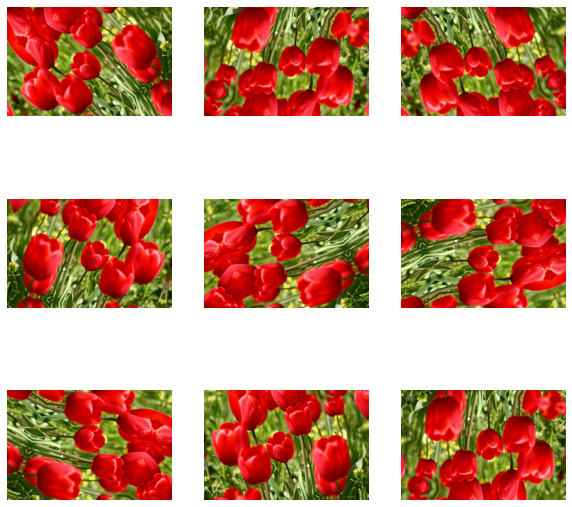

In [66]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])
image = tf.expand_dims(image, 0)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)#함수형 패러다임처럼 사용
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off") #함수형 패러다임처럼 사용


1) 모델 내 적용

In [ ]:
model = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model
])

2) 모델 밖 적용

In [ ]:
aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))

In [38]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(2,)
])

- 모델 생성 직후에는 내부적으로 build되어있지 않음
- input_shape 없어도 됨

In [40]:
model.built

False

In [41]:
model.predict([1,2,3,]) #내부에서 build

array([[-0.98302937,  0.7170578 ],
       [-1.9660587 ,  1.4341156 ],
       [-2.949088  ,  2.1511736 ]], dtype=float32)

In [4]:
import numpy as np

입력에 따라서 자동 빌드됨

- 인스턴스를 함수처럼 사용할수 있게 __call__ 정의되어잇음
- 함수형 패러다임 지원
    - 모든객체는 함수처럼 사용 가능
- Tensor연산 하면 Tensor형태로 바뀜

In [44]:
a= np.array([1,2,3])

In [45]:
model.built #내부 자동으로 구축됨

True

In [25]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[-0.09815836,  1.0732847 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [46]:
model(a) #함수형 패러다임

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.98302937,  0.7170578 ],
       [-1.9660587 ,  1.4341156 ],
       [-2.949088  ,  2.1511736 ]], dtype=float32)>

In [47]:
model(np.array([1,2]))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.98302937,  0.7170578 ],
       [-1.9660587 ,  1.4341156 ]], dtype=float32)>

In [48]:
b=tf.constant([1,2,3])
tf.add(a,3) #리소스 더 필요함

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([4, 5, 6])>

In [49]:
np.add(b,3)

array([4, 5, 6], dtype=int32)

build
- 행렬연산 input,output shape알면 내부 알아서 자동 조정 가능 

compile
- 학습 전략
    - loss
    - optimizer
    - metrics 
    

In [ ]:
@tf.function #just in time(JIT) 내부적 컴파일

- layer grouping 통해서 그룹별 매소드 지원 가능
- 하나의 레이어 처럼 취급해서 관리 쉬움
- 모델안에 모델을 넣을 수 있음
    -transfer learning에 활용

In [83]:
m=tf.keras.applications.MobileNetV2()

14540800/14536120 [==============================] - 0s 0us/step


In [84]:
m2=tf.keras.Sequential([
    m  
])

tensorflow 모델 5가지
- tf.nn
    - 저수준
    - 지원하지 않는 기능 만들 수 있으나 subclassing되서 잘 사용 안함게 됨
- tf.estimator
- tf.keras
    - seq 단반향
    - model : multi-inputs,multi-outputs
    - subclassing

In [85]:
m2.layers #모델을 레이어처럼 사용

In [86]:
m2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1000)              3538984   
Total params: 3,538,984
Trainable params: 3,504,872
Non-trainable params: 34,112
_________________________________________________________________


- 모델 밖에서 데이터 바꾸기
- 전처리 많은 경우 미리 1차원화

In [87]:
mnist = tf.keras.datasets.mnist

In [88]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

11493376/11490434 [==============================] - 0s 0us/step


-  모델 안에서 바꾸기
    - Flatten

In [89]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.reshape(-1,28*28)
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

- 마지막 레이어는 activation function없고 compile에서  from_logits


In [ ]:
#모델내부에서 Flatten
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

validation accuracy : 65%
- 성능 높이도록 파인튜닝

In [ ]:
tf.keras.layers. #add, multiply, dot,Lambda

### 2. layers.Lambda 레이어
- 재활용하지 않기 위해서 일회용으로 사용
- 함수(지정한 규칙)를 사용해서 많은 값을 한꺼번에 바꾸어줌

전처리에서는 사람의 개입이 필요함

> - feature selection
        1. filter
            - 통계
        2. **embeded**
            - 학습을 통해서 전처리함
        3. wrapper

모든 것이 함수형 패러다임
- layer도 함수처럼 사용 (layer ==function== array)

In [92]:
#1.Lambda 함수
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

Wx+b

In [93]:
layer=tf.keras.layers.Dense(4) #4개의 퍼셉트론이 하나의 레이어로 만들어짐

In [94]:
x=np.array([[1,2,3,4,]])
layer(x)

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[3.2596414, 1.4775217, 2.5557876, 3.2088823]], dtype=float32)>

In [95]:
layer.weights #랜덤하게 초기화된 kernel, bias

[<tf.Variable 'dense_11/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.02630901, -0.820545  , -0.41109768, -0.6209239 ],
        [-0.74224   , -0.42655122,  0.20349485,  0.08137238],
        [ 0.6825611 ,  0.7247527 ,  0.20537215,  0.66217464],
        [ 0.66753227,  0.2442277 ,  0.4859448 ,  0.42013437]],
       dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

색상 반전을 한 이유
- 색상에대한 영향을 줄이기 위해서 반전함
-  convolution 특징  단순학 색상, 점,선 부터 추출 (eg.Alex-net)

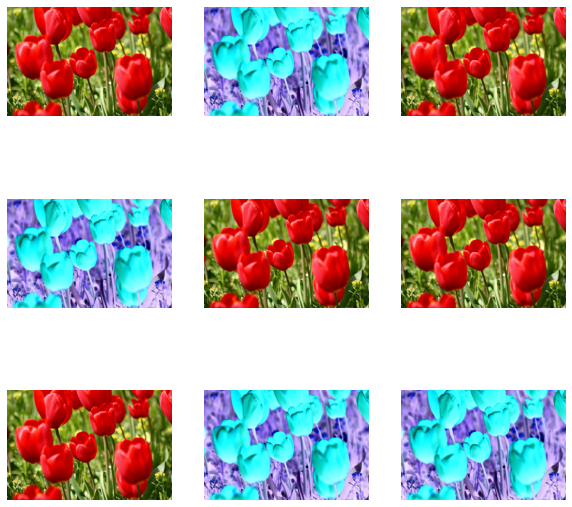

In [96]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image) 
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

재활용 하고 싶은 경우
- `()()` closure technique : __init__, call 

In [97]:
#2. Lambda subclassing
class RandomInvert(layers.Layer):
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor

  def call(self, x):
    return random_invert_img(x)

_ 테크닉
- _ 콘솔에서 _ 최근 output값 불러옴
- 실험용, 더이상 사용하지 않을 경우

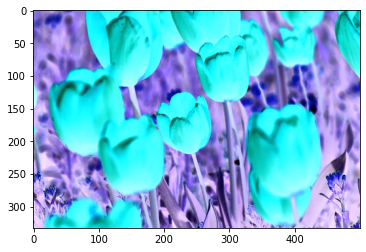

In [98]:
#factor에 따라서 이미지 변하는 정도가 달라짐 
_ = plt.imshow(RandomInvert(factor=0.5)(image)[0])

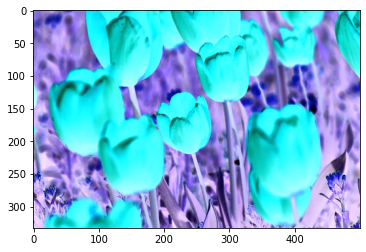

In [99]:
_ = plt.imshow(RandomInvert()(image)[0]) #상동

call함수
- built 여부 확인
- super().call

In [ ]:
import inspect
print(inspect.getsource(tf.keras.models.Sequential.call))

  def call(self, inputs, training=None, mask=None):  # pylint: disable=redefined-outer-name
    # If applicable, update the static input shape of the model.
    if not self._has_explicit_input_shape:
      if not tensor_util.is_tensor(inputs):
        # This is a Sequential with mutiple inputs. This is technically an
        # invalid use case of Sequential, but we tolerate it for backwards
        # compatibility.
        self._use_legacy_deferred_behavior = True
        self._build_input_shape = nest.map_structure(_get_shape_tuple, inputs)
        if tf2.enabled():
          logging.warning('Layers in a Sequential model should only have a '
                          'single input tensor, but we receive a %s input: %s'
                          '\nConsider rewriting this model with the Functional '
                          'API.' % (type(inputs), inputs))
      else:
        self._build_graph_network_for_inferred_shape(inputs.shape, inputs.dtype)

    if self._graph_initialized:
    

In [ ]:
tf.keras.models.Sequential.__base__

tensorflow.python.keras.engine.functional.Functional

- _run_internal_graph 부름
- 계속 위임함
- build check, __call__
    - 커스텀 레이터 참고 : https://www.tensorflow.org/tutorials/customization/custom_layers?hl=ko

In [ ]:
print(inspect.getsource(tf.keras.models.Sequential.__base__.call))

  def call(self, inputs, training=None, mask=None):
    """Calls the model on new inputs.

    In this case `call` just reapplies
    all ops in the graph to the new inputs
    (e.g. build a new computational graph from the provided inputs).

    Arguments:
        inputs: A tensor or list of tensors.
        training: Boolean or boolean scalar tensor, indicating whether to run
          the `Network` in training mode or inference mode.
        mask: A mask or list of masks. A mask can be
            either a tensor or None (no mask).

    Returns:
        A tensor if there is a single output, or
        a list of tensors if there are more than one outputs.
    """
    return self._run_internal_graph(
        inputs, training=training, mask=mask)



In [ ]:
layer=tf.keras.layers.Dense(100)

In [ ]:
layer(tf.zeros([10,5]))

<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.,

In [ ]:
tf.keras.layers.Dense(100)(tf.zeros([10,5]))

<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.,

### 3. tf.image
- 텐서에서 자주 사용하는 기능 만들어 둠
  - tf.image.flip_left_right() 좌우반전
  - tf.image.rgb_to_grayscale() 흑백
    -     - 색상 정보를 제거하여 계산량 줄임
  - tf.image.adjust_saturation()채도 조정
  - tf.image.adjust_brightness) 밝기 조정
  - tf.image.central_crop(, central_fraction) 중앙에 맞춰 자르기
  - tf.image.rot90() 90도 회전

In [106]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)
image, label = next(iter(train_ds))


In [101]:
dir(train_ds) #__getitem__ 없어서 indexing,slicing 불가

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_buffer_size',
 '_checkpoint_dependencies',
 '_consumers',
 '_deferred_dependencies',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_input_dataset',
 '_inputs',
 '_list_extra_dependencies_for_serializat

- 전체를 메모리에 올리지 않아서 indexing, slicing 불가
- iter, for ... break 사용

In [102]:
for i in train_ds: #__iter__ ->iterable
    print(i)
    break

(<tf.Tensor: shape=(333, 500, 3), dtype=uint8, numpy=
array([[[ 93, 122,  30],
        [ 90, 118,  31],
        [ 88, 118,  28],
        ...,
        [247,  77,  78],
        [253,  87,  87],
        [255,  76,  75]],

       [[ 98, 125,  30],
        [ 95, 124,  32],
        [ 96, 125,  32],
        ...,
        [247,  81,  83],
        [250,  86,  84],
        [252,  71,  64]],

       [[ 98, 126,  26],
        [101, 128,  31],
        [106, 132,  33],
        ...,
        [254,  81,  85],
        [254,  79,  76],
        [252,  55,  47]],

       ...,

       [[ 35,  51,   6],
        [ 21,  49,   0],
        [ 30,  57,   6],
        ...,
        [224, 239,  78],
        [192, 208,  50],
        [ 88,  54,  53]],

       [[ 65,  73,  32],
        [ 20,  46,   0],
        [ 22,  48,   0],
        ...,
        [230, 236,  74],
        [230, 246,  62],
        [ 88,  57,  36]],

       [[ 95,  97,  60],
        [ 15,  41,   0],
        [ 23,  51,   3],
        ...,
        [210, 224,  

In [103]:
x=iter(train_ds)
dir(x) #__next__

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_add_variable_with_custom_getter',
 '_checkpoint_dependencies',
 '_consumers',
 '_create_iterator',
 '_dataset',
 '_deferred_dependencies',
 '_deleter',
 '_element_spec',
 '_flat_output_shapes',
 '_flat_output_types',
 '_gather_saveables_for_checkpoint',
 '_handle_deferred_dependencies',
 '_iterator_resource',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_dependency',
 '_map_resources',
 '_maybe_initialize_trackable',
 '_n

In [116]:
tf.image.flip_left_right(image)
tf.image.rgb_to_grayscale(image)
tf.image.adjust_saturation(image, 3)
tf.image.random_brightness
tf.image.adjust_brightness(image, 0.4)
tf.image.random_crop
tf.image.central_crop(image, central_fraction=0.5)
tf.image.rot90(image)
tf.image.resize
tf.image.resize_with_crop_or_pad

<function tensorflow.python.ops.image_ops_impl.resize_image_with_crop_or_pad>

In [104]:
def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32) 
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label

In [107]:
def augment(image,label):
    ''' 데이터 증강 '''
    image, label = resize_and_rescale(image, label)
  # Add 6 pixels of padding
    image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6) 
   # Random crop back to the original size
    image = tf.image.random_crop(image, size=[IMG_SIZE, IMG_SIZE, 3])
    image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness
    image = tf.clip_by_value(image, 0, 1)
    return image, label

3-way holdout 

- 코드 가독성을 위해서 `()` 사용

In [112]:
batch_size = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.shuffle(1000).map(augment, num_parallel_calls=AUTOTUNE).batch(batch_size).prefetch(AUTOTUNE)

In [113]:
val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [114]:
test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

성능 향상 미미하게 됨

In [115]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 12s 63ms/step - loss: 1.5989 - accuracy: 0.3578 - val_loss: 1.1049 - val_accuracy: 0.5640
Epoch 2/5
92/92 [==============================] - 3s 36ms/step - loss: 1.1749 - accuracy: 0.5360 - val_loss: 1.0183 - val_accuracy: 0.6158
Epoch 3/5
92/92 [==============================] - 3s 35ms/step - loss: 1.0002 - accuracy: 0.6003 - val_loss: 0.8822 - val_accuracy: 0.6703
Epoch 4/5
92/92 [==============================] - 3s 36ms/step - loss: 0.8738 - accuracy: 0.6639 - val_loss: 0.8941 - val_accuracy: 0.6567
Epoch 5/5
92/92 [==============================] - 3s 36ms/step - loss: 0.7301 - accuracy: 0.7219 - val_loss: 0.8483 - val_accuracy: 0.6839
